In [1]:
import numpy as np, curvedsky as cs, plottools as pl, cmb as CMB, cosmology, healpy as hp, local, tools_cmb
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")
ac2rad  = np.pi/10800.
deg2rad = np.pi/180.
Tcmb  = CMB.Tcmb    # CMB temperature

In [2]:
lmax = 2048
l = np.linspace(0,lmax,lmax+1)

In [3]:
aobj0 = local.init_analysis(freq='143',dtype='hm1',ascale=0.5)
aobj1 = local.init_analysis(freq='143',dtype='hm2',ascale=0.5)

In [4]:
wind0 = local.set_mask(aobj0.famask)[0]
wind1 = local.set_mask(aobj1.famask)[0]

In [5]:
mask = hp.fitsfunc.read_map('../data/plk_biref/mask/COM_Mask_Lensing_2048_R3.00_a1.0deg.fits')

In [6]:
W = wind0 * wind1

In [7]:
tmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][0],field=0)
tmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][0],field=0)

In [8]:
Tmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][1],field=0)
Tmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][1],field=0)

In [9]:
Nmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['n'][1],field=0)
Nmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['n'][1],field=0)

In [10]:
nalm = cs.utils.hp_map2alm(2048,lmax,lmax,tmap0-tmap1)

In [11]:
Nalm = cs.utils.hp_map2alm(2048,lmax,lmax,Tmap0+Nmap0-Tmap1-Nmap1)

In [12]:
dcl = cs.utils.alm2cl(lmax,nalm)

In [13]:
dCl = cs.utils.alm2cl(lmax,Nalm)

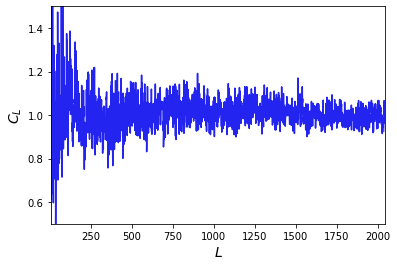

In [14]:
pl.plot_1dstyle(xmin=2,xmax=2048,ymin=.5,ymax=1.5)
plot(l,dcl/dCl)

In [15]:
qmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][0],field=1)
umap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][0],field=2)
qmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][0],field=1)
umap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][0],field=2)

In [16]:
sQmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][1],field=1)
sUmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][1],field=2)
nQmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['n'][1],field=1)
nUmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['n'][1],field=2)
sQmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][1],field=1)
sUmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][1],field=2)
nQmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['n'][1],field=1)
nUmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['n'][1],field=2)

In [17]:
ealm, balm = cs.utils.hp_map2alm_spin(2048,lmax,lmax,2,qmap0-qmap1,umap0-umap1)

In [18]:
Ealm, Balm = cs.utils.hp_map2alm_spin(2048,lmax,lmax,2,(sQmap0+nQmap0-sQmap1-nQmap1),(sUmap0+nUmap0-sUmap1-nUmap1))

In [19]:
ee = cs.utils.alm2cl(lmax,ealm)
bb = cs.utils.alm2cl(lmax,balm)
EE = cs.utils.alm2cl(lmax,Ealm)
BB = cs.utils.alm2cl(lmax,Balm)

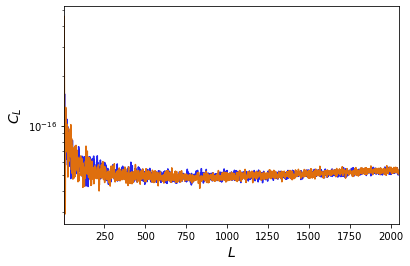

In [20]:
pl.plot_1dstyle(xmin=2,xmax=2048,ylog=True)
plot(ee)
plot(EE)

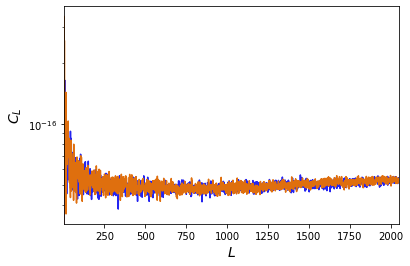

In [21]:
pl.plot_1dstyle(xmin=2,xmax=2048,ylog=True)
plot(bb)
plot(BB)